During the last few decades, with the rise of Youtube, Amazon, Netflix and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries).

![image](https://miro.medium.com/max/2000/1*m_Z6Da5FZ62KN2yH-x_GOQ@2x.png) 

In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news_articles.csv


In [108]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model


# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
 
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


#TL pecific modules
from keras.applications.vgg16 import VGG16

In [109]:
df = pd.read_csv('/kaggle/input/news_articles.csv')

In [110]:
df.head(10)

,Article_Id,Title,Author,Date,Content,URL
0,0,14 dead after bus falls into canal in Telangan...,Devyani Sultania,"August 22, 2016 12:34 IST",At least 14 people died and 17 others were inj...,http://www.ibtimes.co.in/14-dead-after-bus-fal...
1,1,Pratibha Tiwari molested on busy road Saath ...,Suparno Sarkar,"August 22, 2016 19:47 IST",TV actress Pratibha Tiwari who is best known ...,NaN
2,2,US South Korea begin joint military drill ami...,Namrata Tripathi,"August 22, 2016 18:10 IST",The United States and South Korea began a join...,http://www.ibtimes.co.in/us-south-korea-begin-...
3,3,Illegal construction in Bengaluru Will my hou...,S V Krishnamachari,"August 22, 2016 17:39 IST",The relentless drive by Bengaluru s Bangalore...,http://www.ibtimes.co.in/illegal-construction-...
4,4,Punjab Gau Rakshak Dal chief held for assaulti...,Pranshu Rathee,"August 22, 2016 17:34 IST",Punjab Gau Raksha Dal chief Satish Kumar and h...,http://www.ibtimes.co.in/punjab-gau-rakshak-da...
5,5,Phillipines drug war 1 800 drug-related death...,Pranshu Rathee,"August 22, 2016 14:51 IST",Philippines police on Monday said that the num...,NaN
6,6,Infosys shares likely to fall on Tuesday after...,S V Krishnamachari,"August 15, 2016 16:03 IST",Infosys shares could fall sharply on Tuesday w...,http://www.ibtimes.co.in/infosys-shares-likely...
7,7,Dialogue crucial in finding permanent solution...,Pranshu Rathee,"August 22, 2016 21:11 IST",Prime Minister Narendra Modi has expressed dee...,NaN
8,8,School bus overturns in Jammu killing 1 and in...,Devyani Sultania,"August 10, 2016 11:51 IST",A school bus in the town of Bishnah in Jammu s...,http://www.ibtimes.co.in/school-bus-overturns-...
9,9,Rajasthan Villagers rescue 50 kids after scho...,Devyani Sultania,"August 8, 2016 14:45 IST",A school bus carrying around 50 children fell ...,http://www.ibtimes.co.in/rajasthan-villagers-r...


In [111]:
#total articles
len(df['Article_Id'])

4831

In [112]:
#unique aticles
df['Article_Id'].unique()

array([   0,    1,    2, ..., 4828, 4829, 4830])

# Generating data for Number of users per Article

In [113]:
import scipy
import random
from scipy import stats

In [114]:
random.seed(15)

user_session = stats.geom.rvs(size=4831,  # Generate geometric data
                                  p=0.3)       # With success prob 0.5

In [115]:
user_session.size,user_session.max(),user_session.min()

(4831, 28, 1)

In [116]:
user_session[:10],sum(user_session)

(array([7, 3, 5, 1, 2, 2, 1, 4, 3, 2]), 16267)

In [117]:

count_dict = {x : list(user_session).count(x) for x in user_session}
count_dict

{7: 170,
 3: 716,
 5: 355,
 1: 1439,
 2: 998,
 4: 514,
 9: 90,
 6: 233,
 8: 114,
 19: 4,
 12: 27,
 13: 21,
 11: 36,
 14: 19,
 10: 61,
 17: 8,
 18: 4,
 15: 9,
 20: 3,
 16: 5,
 21: 2,
 23: 1,
 28: 1,
 22: 1}

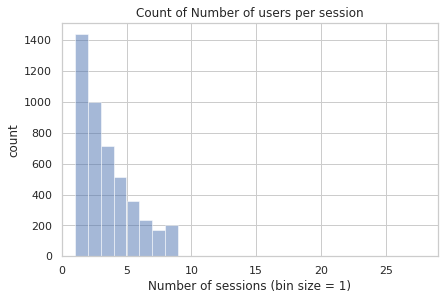

In [118]:
#depicts number of users per number of sessions
    
bins = np.arange(0, 10, 1) # fixed bin size

plt.xlim([min(user_session)-1, max(user_session) +1])

plt.hist(user_session, bins=bins, alpha=0.5)
plt.title("Count of Number of users per session")
plt.xlabel('Number of sessions (bin size = 1)')
plt.ylabel('count')

plt.show()

In [119]:
import numpy as np

user_Id = range(1,4831)

In [120]:
userId_session = list(zip(user_Id,[10*i for i in user_session]))

In [121]:
type(userId_session), userId_session[:5]

(list, [(1, 70), (2, 30), (3, 50), (4, 10), (5, 20)])

In [122]:
#Calculating total number of articles served in a day in all sessions (may be clicked or not)

sum1 = 0
for i in range(len(userId_session)):
    
    sum1 += userId_session[i][1]
    
sum1

162550

In [123]:
UserIDs = []

for i in range(len(userId_session)):
    
    for j in range(userId_session[i][1]):
        UserIDs.append(userId_session[i][0])

In [124]:
len(UserIDs)   #matches with sum1 above

162550

In [125]:
UserIDs[:20]   # UserIds generated for all sessions the user opens

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [126]:
session_list = list(user_session)
session_list[:10]

[7, 3, 5, 1, 2, 2, 1, 4, 3, 2]

In [127]:
session_Id =[]

for i in session_list:
    
    for j in range(1,i+1):
#         print j
        session_Id.append([j for i in range(10)])

In [128]:
session_Id = np.array(session_Id).flatten()

In [129]:

session_Id.shape

(162670,)

In [130]:
User_session = list(zip(UserIDs,session_Id ))

In [131]:

len(User_session),type(User_session)

(162550, list)

In [132]:
import pandas as pd

df = pd.DataFrame(User_session, columns=['UserId', 'SessionId'])

In [133]:
df.tail(20)

,UserId,SessionId
162530,4829,5
162531,4829,5
162532,4829,5
162533,4829,5
162534,4829,5
162535,4829,5
162536,4829,5
162537,4829,5
162538,4829,5
162539,4829,5


In [134]:
Article_Id = list(range(4831))

 totla article served in one day / no of unique articles = (161730/4831)

In [135]:
type(Article_Id)

list

In [136]:
161730/4831

33.47754088180501

In [137]:
Article_Id = Article_Id*int(161730/4831)  



In [138]:
len(Article_Id)

159423

to make a square matrix 

In [139]:
import random
for x in range(len(User_session)-len(Article_Id)):
    Article_Id.append(random.randint(1,4831))

In [140]:
len(Article_Id)

162550

> Now you can see length of user session and article_id is same

In [141]:
from random import shuffle
shuffle(Article_Id)

In [142]:
df['ArticleId_served'] = Article_Id

In [143]:
df.tail()

,UserId,SessionId,ArticleId_served
162545,4830,1,1922
162546,4830,1,83
162547,4830,1,2556
162548,4830,1,4363
162549,4830,1,2023


In [144]:
len(df['UserId'].unique())

4830

# creating rating 

In [145]:
df

,UserId,SessionId,ArticleId_served
0,1,1,588
1,1,1,3408
2,1,1,4546
3,1,1,3905
4,1,1,3948
...,...,...,...
162545,4830,1,1922
162546,4830,1,83
162547,4830,1,2556
162548,4830,1,4363


In [146]:
p = len(df['UserId'])

In [147]:
import random
numLow = 1 
numHigh = 6
x = []
for i in range (0,p):
    m = random.sample(range(numLow, numHigh), 1)
    x.append(m)

In [148]:
x[:3]

[[5], [5], [4]]

In [149]:
flat_list = []
for sublist in x:
    for item in sublist:
        flat_list.append(item)

In [150]:
len(flat_list)

162550

In [151]:
df.head()

,UserId,SessionId,ArticleId_served
0,1,1,588
1,1,1,3408
2,1,1,4546
3,1,1,3905
4,1,1,3948


In [152]:
df['rating'] = flat_list

In [153]:
len(df['rating'])

162550

In [154]:
df.head()

,UserId,SessionId,ArticleId_served,rating
0,1,1,588,5
1,1,1,3408,5
2,1,1,4546,4
3,1,1,3905,3
4,1,1,3948,3


In [155]:
# df.to_csv('file1.csv') 
# saving the dataframe 
df.to_csv('file3.csv', index=False)



 # Creating the Utility Matrix

In [156]:
index=list(df['UserId'].unique())
columns=list(df['ArticleId_served'].unique())
index=sorted(index)
columns=sorted(columns)
 
util_df=pd.pivot_table(data=df,values='rating',index='UserId',columns='ArticleId_served')

>  Nan implies that user has not rated the corressponding Article.

In [157]:
util_df

ArticleId_served,0,1,2,3,4,5,6,7,8,9,...,4821,4822,4823,4824,4825,4826,4827,4828,4829,4830
UserId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


UNDERSTANDING--

1) This is the utility matrix; for each of the 4830 users arranged rowwise; each column shows the rating of the article given by a particular user.

2) Note that majority of the matrix is filled with 'Nan' which shows that majority of the articles are unrated by many users.

3) For each article-user pair if the entry is NOT 'Nan' the vaue indicates the rating given by user to that corressponding article.

4) For now I am gonna fill the 'Nan' value with value '0'. But note that this just is just indicative, a **0 implies NO RATING** and doesn't mean that user has rated 0 to that article. It doesn't at all represent any rating.

RATING SCALE IS [1 2 3 4 5]

In [158]:
util_df.fillna(0)

ArticleId_served,0,1,2,3,4,5,6,7,8,9,...,4821,4822,4823,4824,4825,4826,4827,4828,4829,4830
UserId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating Training and Validation Sets.

In [159]:
# x_train,x_test,y_train,y_test=train_test_split(df[['UserId','ArticleId_served']],df[['rating']],test_size=0.20,random_state=42)
users = df.UserId.unique()
movies = df.ArticleId_served.unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

In [160]:
users

array([   1,    2,    3, ..., 4828, 4829, 4830])

In [161]:
df['ArticleId_served'].head(70)

0      588
1     3408
2     4546
3     3905
4     3948
      ... 
65     577
66    2617
67    3170
68    4403
69     325
Name: ArticleId_served, Length: 70, dtype: int64

In [162]:
df['UserId'] = df['UserId'].apply(lambda x: userid2idx[x])
df['ArticleId_served'] = df['ArticleId_served'].apply(lambda x: movieid2idx[x])
split = np.random.rand(len(df)) < 0.8
train = df[split]
valid = df[~split]
print(train.shape , valid.shape)

(129997, 4) (32553, 4)


In [163]:
df['ArticleId_served'].head(70)

0      0
1      1
2      2
3      3
4      4
      ..
65    64
66    65
67    66
68    67
69    68
Name: ArticleId_served, Length: 70, dtype: int64

# Matrix Factorization

Here comes the main part!!!

1) Now we move on to the crux of the notebook ie Matrix Factorization. In matrix facorization, we basically break a matrix into usually 2 smaller matrices each with smaller dimensions. these matrices are oftem called 'Embeddings'. We can have variants of Matrix Factorizartion-> 'Low Rank MF' , 'Non-Negaive MF' (NMF) and so on..

2) Here I have used the so called 'Low Rank Matrix Factorization'. I have created embeddings for both user as well as the item; articles in our case. The number of dimensions or the so called 'Latent Factors' in the embeddings is a hyperparameter to deal with in this implementation of Collaborative Filtering.

### Creating the Embeddings ,Merging and Making the Model from Embeddings

In [164]:
n_article=len(df['ArticleId_served'].unique())
n_users=len(df['UserId'].unique())
n_latent_factors=64  # hyperparamter to deal with. 

#### Input Object 

Input() is used to instantiate a Keras tensor

In [165]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')

In [166]:
user_input.shape

TensorShape([None, 1])

#### Embedding layer
Turns positive integers (indexes) into dense vectors of fixed size.

e.g. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

**Input shape**

2D tensor with shape: (batch_size, input_length).

**Output shape**

3D tensor with shape: (batch_size, input_length, output_dim).

tf.keras.layers.Embedding(
     input_dim,
     output_dim,
     embeddings_initializer="uniform",
     embeddings_regularizer=None,
     activity_regularizer=None,
     embeddings_constraint=None,
     mask_zero=False,
     input_length=None,
     **kwargs
 )

In [167]:
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_embedding.shape

TensorShape([None, 1, 64])

#### Flatten layer
Flattens the input. Does not affect the batch size.

Note: If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).

In [168]:
user_vec =Flatten(name='FlattenUsers')(user_embedding)
user_vec.shape

TensorShape([None, None])

In [169]:
article_input=Input(shape=(1,),name='article_input',dtype='int64')
article_embedding=Embedding(n_article,n_latent_factors,name='article_embedding')(article_input)
article_vec=Flatten(name='FlattenArticles')(article_embedding)
# article_vec

In [170]:
article_vec

<tf.Tensor 'FlattenArticles_4/Reshape:0' shape=(None, None) dtype=float32>

#### Dot Layer
Layer that computes a dot product between samples in two tensors.

E.g. if applied to a list of two tensors a and b of shape (batch_size, n), the output will be a tensor of shape (batch_size, 1) where each entry i will be the dot product between a[i] and b[i].

In [171]:
sim=dot([user_vec,article_vec],name='Simalarity-Dot-Product',axes=1)
model =keras.models.Model([user_input, article_input],sim)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
article_input (InputLayer)      (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 64)        309120      user_input[0][0]                 
__________________________________________________________________________________________________
article_embedding (Embedding)   (None, 1, 64)        309184      article_input[0][0]              
____________________________________________________________________________________________

UNDERSTANDING--

1) First we need to create embeddings for both the user as well as the item or article. For this I have used the Embedding layer from keras.

2) Specify the input expected to be embedded (Both in user and item embedding). The use a Embedding layer which expects the no of latent factors in the resulting embedding and also the no of users or items.

3) Then we take the 'Dot-Product' of both the embeddings using the 'merge' layer. Note that 'dot-product' is just a measure of simalrity and we can use any other mode like 'mulitply' or 'cosine simalarity' or 'concatenate' etc...

4) Lastly we make a Keras model from the specified details.



### Compiling the Model

#### *compile* method 

Configures the model for training.



Model.compile(
    optimizer="rmsprop",
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    **kwargs
)


In [172]:
model.compile(optimizer=Adam(lr=1e-4),loss='mse')

In [173]:
train.shape

(129997, 4)

In [174]:
train.shape
batch_size=128
epochs=50

# Fitting on Training set & Validating on Validation Set.

#### fit method
Trains the model for a fixed number of epochs (iterations on a dataset).

***Returns***

A History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).


Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose=1,
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

In [175]:
History = model.fit([train.UserId,train.ArticleId_served],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.UserId,valid.ArticleId_served],valid.rating),
                              verbose = 1)

Train on 129997 samples, validate on 32553 samples
Epoch 1/50
129997/129997 [==============================] - 4s 33us/step - loss: 10.9844 - val_loss: 10.9500
Epoch 2/50
129997/129997 [==============================] - 4s 33us/step - loss: 10.9708 - val_loss: 10.9498
Epoch 3/50
129997/129997 [==============================] - 4s 33us/step - loss: 10.9553 - val_loss: 10.9490
Epoch 4/50
129997/129997 [==============================] - 4s 34us/step - loss: 10.9370 - val_loss: 10.9469
Epoch 5/50
129997/129997 [==============================] - 4s 34us/step - loss: 10.9136 - val_loss: 10.9415
Epoch 6/50
129997/129997 [==============================] - 4s 33us/step - loss: 10.8819 - val_loss: 10.9291
Epoch 7/50
129997/129997 [==============================] - 4s 33us/step - loss: 10.8362 - val_loss: 10.9026
Epoch 8/50
129997/129997 [==============================] - 4s 33us/step - loss: 10.7678 - val_loss: 10.8513
Epoch 9/50
129997/129997 [==============================] - 4s 33us/step - lo

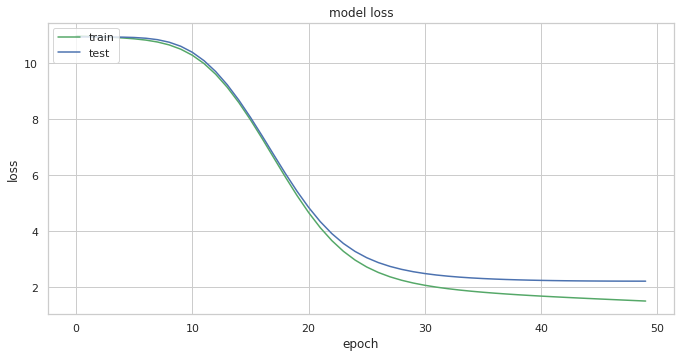

In [176]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()